In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt

In [37]:
import numpy as np

# Function to generate hexagon mesh points
def generate_hexagon(side_length):
    points = []
    for i in range(12):
        angle = np.pi / 3 * i
        x = side_length * np.cos(angle)
        y = side_length * np.sin(angle)
        points.append((x, y, 0))
    return np.array(points)

def Make_L(
        length=100,
        width=100,
        cut_l = 100,
        cut_r = 0,
        cut_up = 0,
        step=5,
        H=4,
        material='Au',
        left = True
):

    full_geo = structures.rect_wire(step, L=int(length/step), W=int(width/step), H=H)
    full_geo = full_geo[np.logical_not(np.logical_and(np.logical_and(
                    full_geo.T[0]>cut_r,
                    full_geo.T[0]<=cut_l),
                    full_geo.T[1]<=cut_up) )]
    
    if left:
        full_geo.T[0] = full_geo.T[0]*-1

    #m = getattr(Epsilon_ExpClass, material)()
    #struct = structures.struct(step, full_geo, m)

    return full_geo



In [ ]:
# Generate hexagon mesh points
side_length = 10
hexagon_points = generate_hexagon(side_length)

#plt.scatter(hexagon_points[:, 0], hexagon_points[:, 1], c='blue', marker='h', s = 2000)   
plt.xlim(-50, 50)
plt.ylim(-50, 50)
# Display the points
print("Hexagon Mesh Points:")
print(hexagon_points)

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 844/844 dipoles valid


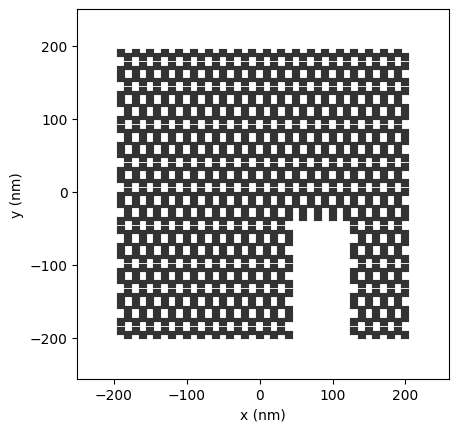

N_dipoles sim = 844


In [4]:
mesh = 'hex'
step = 20

## rebuild structure from Giessen paper
## (Schäferling et al. PRX 2, 031010 (2012))
full_geo = structures.rect_wire(step, L=int(400/step), W=int(400/step), H=2, mesh=mesh)
full_geo = full_geo[np.logical_not(np.logical_and(np.logical_and(
                full_geo.T[0]>40,
                full_geo.T[0]<=120),
                full_geo.T[1]<=-40) )]

material = materials.gold()
struct = structures.struct(step, full_geo, material)

## --- Setup incident field: LCP and RCP plane wave
field_generator = fields.plane_wave
wavelengths = [2500]
kwargs = dict(inc_angle=180, E_s=1, E_p=1, phase_Es=[-np.pi/2, np.pi/2])    # LCP, RCP
efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=kwargs)

## --- environment: vacuum
dyads = propagators.DyadsQuasistatic123(n1=1)


sim = core.simulation(struct, efield, dyads)

visu.structure(sim)
print ('N_dipoles sim =', len(sim.struct.geometry))